# Time Varying Market Betas II

Using fresh MSCI and GSCI data from Bloomberg

In [1]:
from utils.models import *
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0
filterpy: 1.4.5


## MSCI ACWI

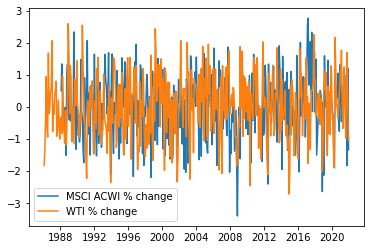

In [2]:
acwi = clean_series('real', load('data/MSCI_ACWI.csv').pct_change().dropna())
c1 = clean_series('contract_1', load('data/WTI.csv').pct_change().dropna())
plt.plot(acwi, label='MSCI ACWI % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [5]:
lags = 0
kalman = KF(lags=lags)
kf = kalman.run('contract_1', 'real', c1.join(acwi).dropna())

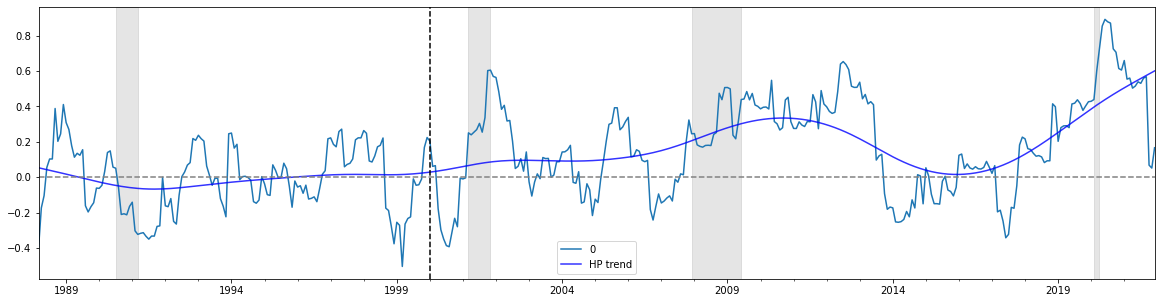

In [6]:
hp_kalman_plot(kf)

<BarContainer object of 1 artists>

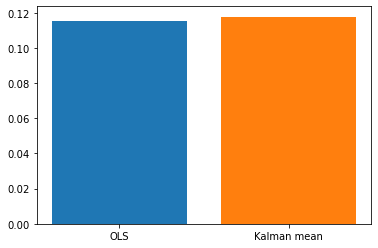

In [7]:
dl = DL('contract_1', 'real', c1.join(acwi).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl.model.params))
plt.bar('Kalman mean', kf.mean())

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 0.9930296651960777
RMSE Kalman: 0.9136030779655011


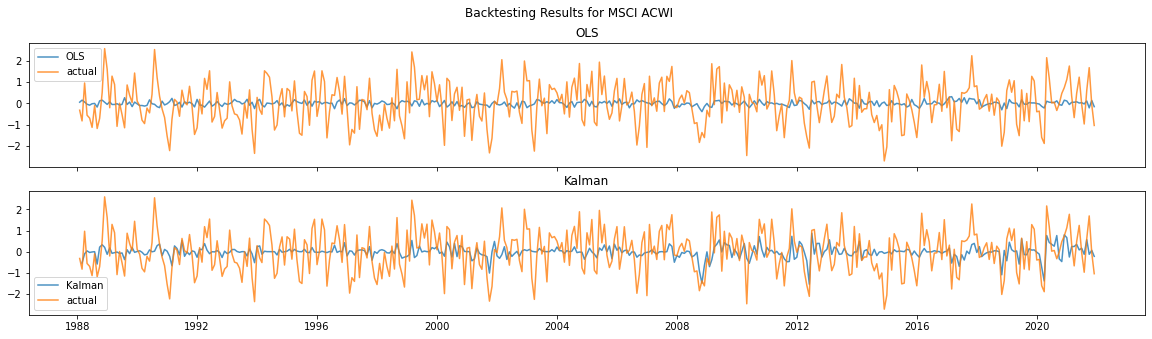

In [8]:
x = acwi.real
plot_backtests(c1.contract_1, 'MSCI ACWI', {'OLS': ols_backtest(x, dl.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(acwi.index))

## MSCI EM

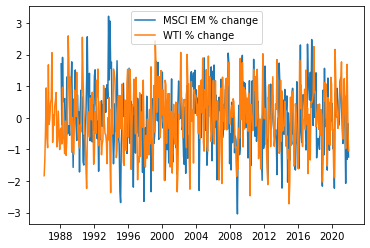

In [9]:
em = clean_series('real', load('data/MSCI_EM.csv').pct_change().dropna())
plt.plot(em, label='MSCI EM % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [10]:
kalman = KF(lags=lags)
kf2 = kalman.run('contract_1', 'real', c1.join(em).dropna())

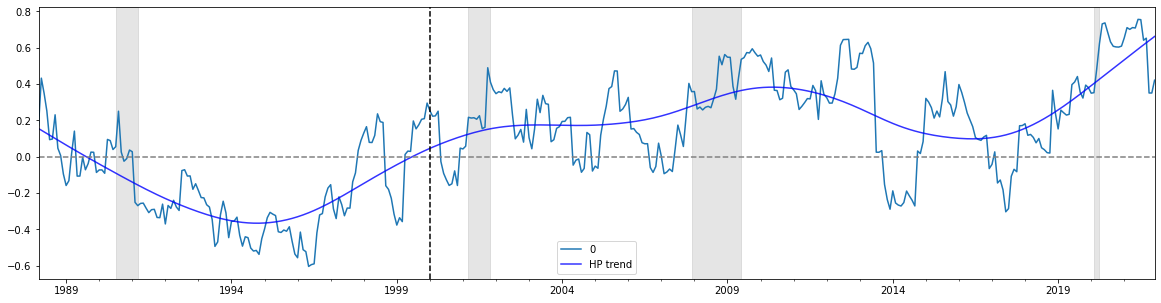

In [11]:
hp_kalman_plot(kf2)

<BarContainer object of 1 artists>

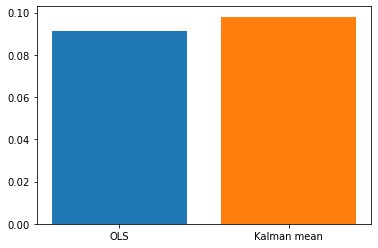

In [12]:
dl2 = DL('contract_1', 'real', c1.join(em).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl2.model.params))
plt.bar('Kalman mean', kf2.mean())

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 0.9954175795051259
RMSE Kalman: 0.8993305949648153


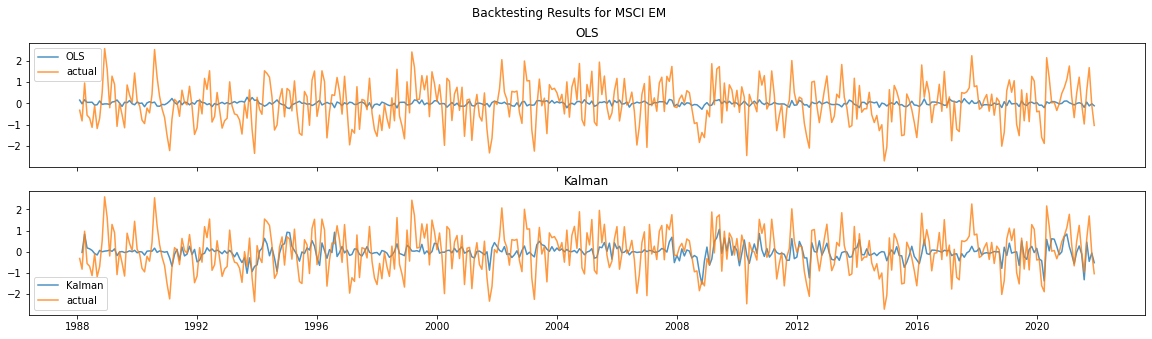

In [13]:
x = em.real
plot_backtests(c1.contract_1, 'MSCI EM', {'OLS': ols_backtest(x, dl2.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(em.index))

## GS Non-Energy Commodity Index

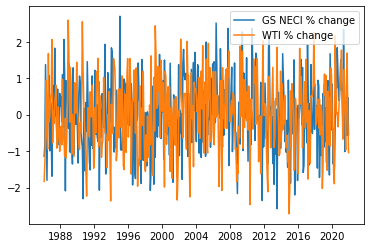

In [14]:
gsneci = clean_series('real', load('data/GSNECI.csv').pct_change().dropna())
plt.plot(gsneci, label='GS NECI % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [15]:
kalman = KF(lags=lags)
kf3 = kalman.run('contract_1', 'real', c1.join(gsneci).dropna())

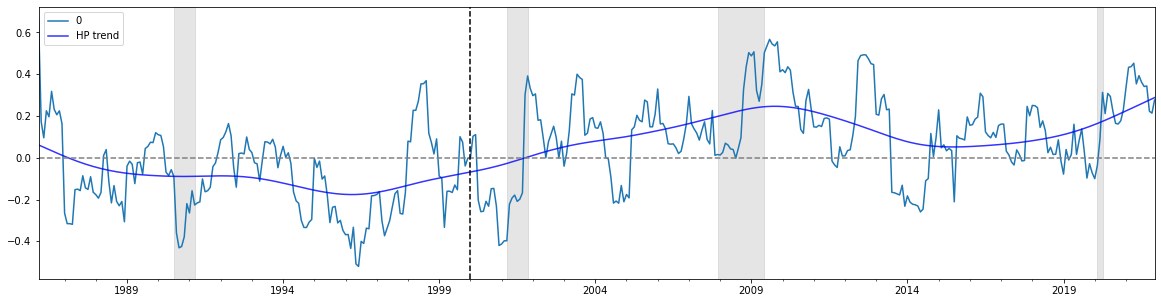

In [16]:
hp_kalman_plot(kf3)

<BarContainer object of 1 artists>

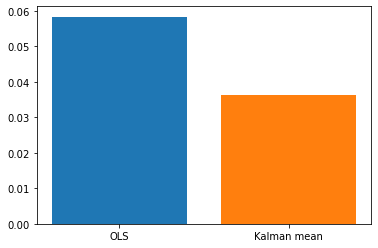

In [17]:
dl3 = DL('contract_1', 'real', c1.join(gsneci).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl3.model.params))
plt.bar('Kalman mean', kf3.mean())

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 0.9930666069571852
RMSE Kalman: 0.9267142254964665


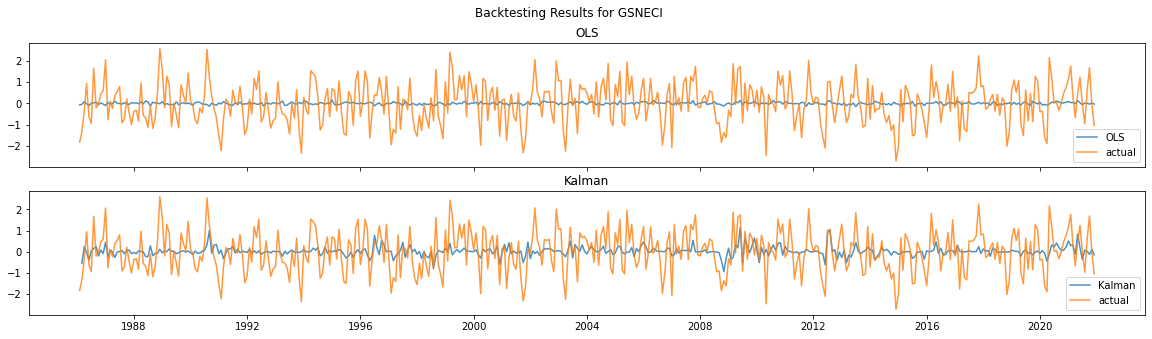

In [18]:
x = gsneci.real
plot_backtests(c1.contract_1, 'GSNECI', {'OLS': ols_backtest(x, dl3.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(gsneci.index))

## GSCI (including energy)

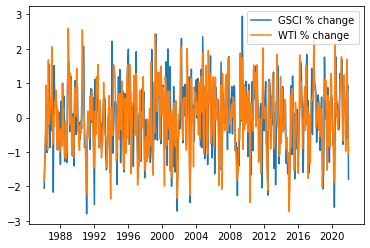

In [19]:
gsci = clean_series('real', load('data/GSCI.csv').pct_change().dropna())
plt.plot(gsci, label='GSCI % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [22]:
kalman = KF(lags=lags)
kf4 = kalman.run('contract_1', 'real', c1.join(gsci).dropna())

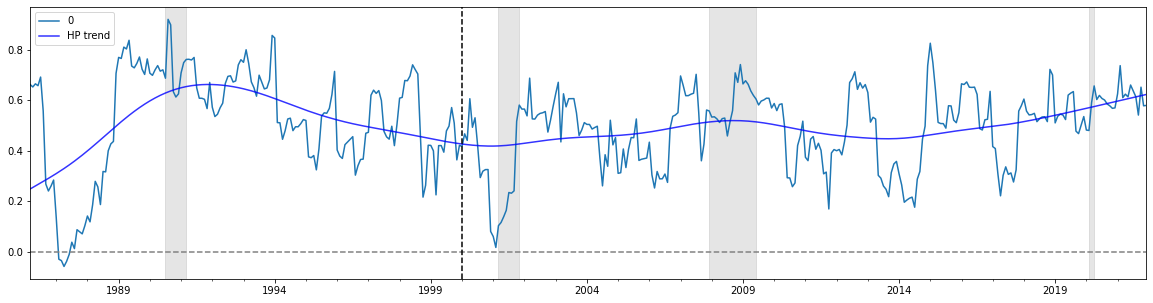

In [23]:
hp_kalman_plot(kf4)

<BarContainer object of 1 artists>

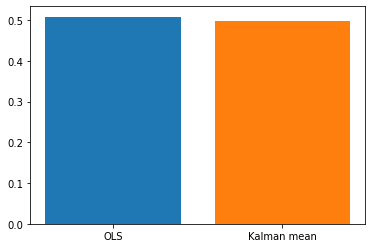

In [24]:
dl4 = DL('contract_1', 'real', c1.join(gsci).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl4.model.params))
plt.bar('Kalman mean', kf4.mean())

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 0.8570480845184411
RMSE Kalman: 0.8047074835093228


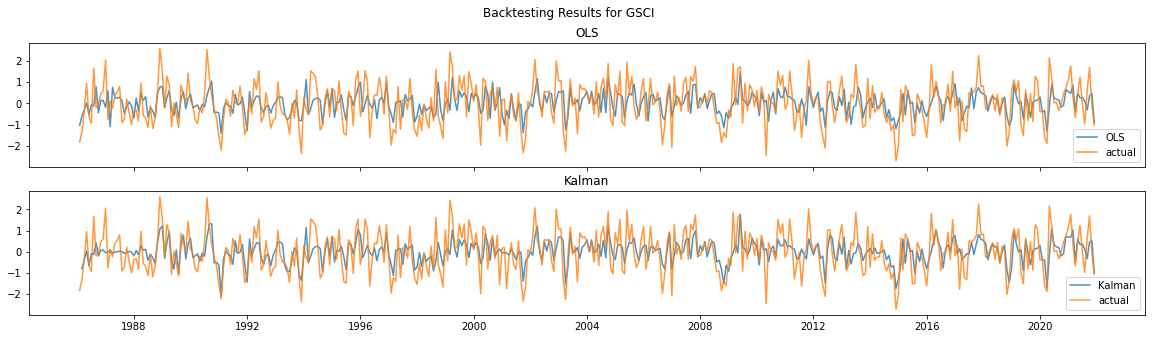

In [25]:
x = gsci.real
plot_backtests(c1.contract_1, 'GSCI', {'OLS': ols_backtest(x, dl4.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(gsci.index))